In [2]:
import pandas as pd

In [3]:
i=pd.read_csv("E:/datasets/insurance_suscribe.csv")

In [4]:
i.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
i.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
i.columns[(i.isnull().sum()*100/i.shape[0])>50]

Index([], dtype='object')

In [18]:
i.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,39191,30631,30631.000000,50882.000000,50882.000000,50882.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,NaN,8973,NaN,27951,40536,NaN,NaN,42460,13010,4499,NaN,NaN,NaN,NaN
mean,25441.500000,NaN,1732.788707,NaN,NaN,44.856275,42.738866,NaN,NaN,NaN,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,NaN,1424.081652,NaN,NaN,17.310271,17.319375,NaN,NaN,NaN,1.025923,6.340663,6590.074873,0.427055
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,NaN,2667.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18096.000000,0.000000


In [23]:

i=i.rename(columns={'Health Indicator':'Health_Indicator'})

In [24]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health_Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [29]:
i.Health_Indicator=i.Health_Indicator.fillna('X1')
i.Holding_Policy_Duration=i.Holding_Policy_Duration.fillna('1.0')
i.Holding_Policy_Type=i.Holding_Policy_Type.fillna(i.Holding_Policy_Type.median())

In [30]:
i.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [33]:
i=i.iloc[:,1:16]

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:

#i[i.select_dtypes(include=['object']).columns]=i[i.select_dtypes(include=['object']).columns].apply(le.fit_transform)
i[i.select_dtypes(include=['object']).columns]=i[i.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [38]:
i.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22,3213,1,0,36,36,0,0,5,3.0,22,11628.0,0
1,31,1117,0,1,75,22,0,1,0,3.0,22,30510.0,0
2,31,3732,0,0,32,32,0,0,0,1.0,19,7450.0,1
3,16,4378,0,1,52,48,0,0,5,3.0,19,17780.0,0
4,34,2190,1,0,44,44,0,1,8,1.0,16,10404.0,0


In [39]:
from sklearn.model_selection import train_test_split


In [40]:
train,test=train_test_split(i,test_size=0.2)

In [90]:
train_x=train.iloc[:,0:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,0:-1]
test_y=test.iloc[:,-1]

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression( class_weight='balanced')

#lr=LogisticRegression()

In [97]:
lr.fit(train_x,train_y)

C:\Users\sunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [98]:
pred=lr.predict(test_x)

In [99]:
from sklearn.metrics import confusion_matrix
tab1=confusion_matrix(pred,test_y)
tab1

array([[3301,  841],
       [4451, 1584]], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)

0.48000393043136486

In [101]:
from sklearn.metrics import precision_score
precision_score(test_y,pred)

0.26246893123446563

In [102]:
lr.predict_proba(test_x)

array([[0.40341781, 0.59658219],
       [0.58731575, 0.41268425],
       [0.49894335, 0.50105665],
       ...,
       [0.60915615, 0.39084385],
       [0.45004216, 0.54995784],
       [0.47039649, 0.52960351]])

In [103]:
pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [105]:
roc_auc_score(test_y,pred)

0.5395107348419563

In [106]:
prob=lr.predict_proba(test_x)

In [107]:
prob[:,1]

array([0.59658219, 0.41268425, 0.50105665, ..., 0.39084385, 0.54995784,
       0.52960351])

In [108]:
fpr,tpr,threshold=roc_curve(test_y,prob[:,1])

In [109]:
fpr

array([0.00000000e+00, 1.28998968e-04, 2.57997936e-04, ...,
       9.97291022e-01, 9.97291022e-01, 1.00000000e+00])

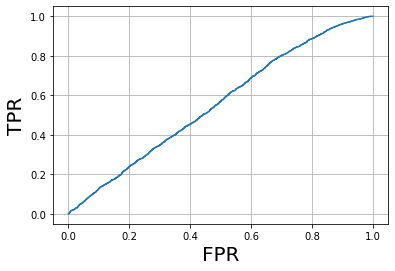

In [110]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("FPR",size=20)
plt.ylabel("TPR",size=20)
plt.grid()
